## Lab 2 - Part 1:
### Pikachu and Pichu - Datapoints. Classification exercise
 
- Task is to make a simple algo that can take user input and predict if it is one or the other.
- I will be using the mean position of Pikachu and Pichu and use Euclidian distance calculate to which the new point is closest to.
- For part 2 I will try out some more advanced models with scikit learn.
 

### Import modules
 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [3]:
datapoints = pd.read_csv("datapoints.txt")
datapoints.head(), datapoints.columns

(   (width (cm)   height (cm)   label (0-pichu   1-pikachu))
 0    21.959384     31.239567                0           NaN
 1    23.635916     36.468215                1           NaN
 2    17.714056     31.441704                0           NaN
 3    21.780200     33.213398                1           NaN
 4    25.206306     36.558816                1           NaN,
 Index(['(width (cm)', ' height (cm)', ' label (0-pichu', ' 1-pikachu))'], dtype='object'))

In [4]:
# Cleaning up the columns, removing unnecessary spaces and text. 
# Dropping  "  1-pikachu))'" NaN Column. Renaming target column to Pika1/Pichu0
datapoints_new = datapoints.drop([" 1-pikachu))"], axis=1)
datapoints_new.rename(columns={"(width (cm)": "Width", " height (cm)": "Height", " label (0-pichu": "Pika1/Pichu0"}, inplace= True)
datapoints_new.head()


,Width,Height,Pika1/Pichu0
0,21.959384,31.239567,0
1,23.635916,36.468215,1
2,17.714056,31.441704,0
3,21.780200,33.213398,1
4,25.206306,36.558816,1


In [5]:
datapoints_new.describe()
# Dataset is balanced 50/50 with Pikachu Pichu.

,Width,Height,Pika1/Pichu0
count,150.000000,150.000000,150.000000
mean,22.062142,33.598281,0.500000
std,2.497307,2.159651,0.501675
min,16.866105,28.888134,0.000000
25%,19.921975,32.005462,0.000000
50%,22.040754,33.315877,0.500000
75%,24.316733,35.320895,1.000000
max,27.194384,40.147170,1.000000


### Prepare Data

In [6]:
# Separate Pikachu and Pichu

# Only Pika
pikachu = datapoints_new[datapoints_new["Pika1/Pichu0"] == 1]

# Mean() Pikachu Position for X and Y
xpika = pikachu['Width'].mean()
ypika = pikachu['Height'].mean() 


# Only pichu
pichu = datapoints_new[datapoints_new["Pika1/Pichu0"] == 0]

# Mean() Pichu Position for X and Y
xpichu = pichu['Width'].mean()
ypichu = pichu['Height'].mean() 



# ---------------- For Visualization later in subplots----------------
# Data frame for test points
data_test_points = [[25, 32, 1], [24.2, 31.5, 1], [22, 34, 1], [20.5, 34, 0]]
testpoints = pd.DataFrame(data_test_points, columns=["Width", "Height", "Pika1/Pichu0"])

# Data frame for mean() points
mean_points = [[xpika, ypika, 1], [xpichu, ypichu, 0]]
mean_points = pd.DataFrame(mean_points, columns=["Width", "Height", "Pika1/Pichu0"])





### Algoritm using the Euclidian distance

In [7]:
# Will prompt the user for X (width) and then Y(height)
import math

result = []
while True:
    try:
        user_x = float(input("Type width(x): "))
        user_y = float(input("Type in height(y): "))
        break
    except ValueError:
        print("Use only numbers with or without decimals.")
        break


a = (xpika-user_x)**2 + (ypika-user_y)**2
distpika = math.sqrt(a)

b = (xpichu-user_x)**2 + (ypichu-user_y)**2
distpichu = math.sqrt(b)

if distpika > distpichu:
    print(f"Width: {user_x} and Height: {user_y}. Pichu!")
        
else:
    print(f"Width: {user_x} and Height: {user_y}. Pikachu!")
        

#Test points with answers:
#1. (25, 32) - pika
#2. (24.2, 31.5) - pika
#3. (22, 34) - pika
#4. (20.5, 34) - pichu



Width: 1.0 and Height: 2.0. Pichu!


### Visualize the data

(25.0, 45.0)

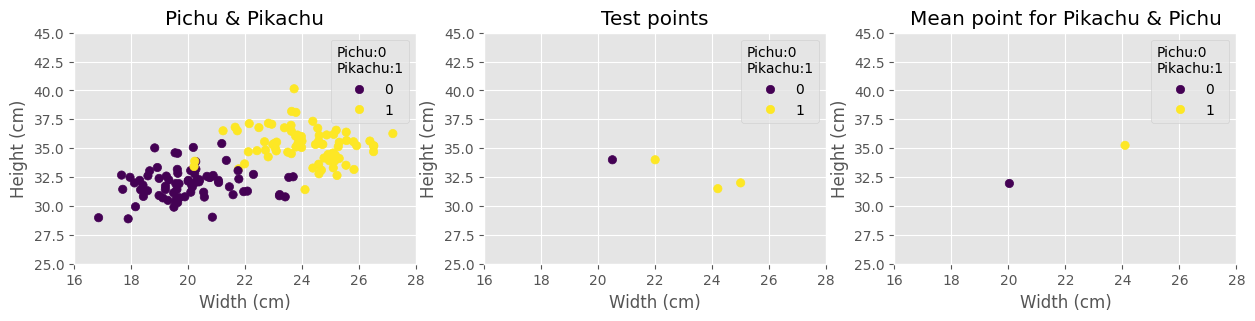

In [8]:
# plt.style.use('default')
plt.style.use('ggplot')

# Create the plot with subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 3,))

# ---------- first ax1 plot -------------
scatter1 = ax1.scatter(datapoints_new["Width"], 
                     datapoints_new["Height"], 
                     c=datapoints_new["Pika1/Pichu0"])

# ax1 Customization
ax1.set(title="Pichu & Pikachu",
       xlabel="Width (cm)",
       ylabel="Height (cm)")
ax1.legend(*scatter1.legend_elements(), title="Pichu:0\nPikachu:1")

ax1.set_xlim([16, 28]) 
ax1.set_ylim([25, 45])


# --------- second ax2 plot ------------------
scatter2 = ax2.scatter(testpoints["Width"], #  testpoints is the dataset we prepared earlier.
                     testpoints["Height"], 
                     c=testpoints["Pika1/Pichu0"])

# ax2 Customization
ax2.set(title="Test points",
       xlabel="Width (cm)",
       ylabel="Height (cm)")
ax2.legend(*scatter2.legend_elements(), title="Pichu:0\nPikachu:1")

ax2.set_xlim([16, 28]) 
ax2.set_ylim([25, 45])

# --------- third ax3 plot ------------------
scatter3 = ax3.scatter(mean_points["Width"], #  testpoints is the dataset we prepared earlier.
                     mean_points["Height"], 
                     c=mean_points["Pika1/Pichu0"])

# ax2 Customization
ax3.set(title="Mean point for Pikachu & Pichu",
       xlabel="Width (cm)",
       ylabel="Height (cm)")
ax3.legend(*scatter3.legend_elements(), title="Pichu:0\nPikachu:1")

ax3.set_xlim([16, 28]) 
ax3.set_ylim([25, 45])

(left):  Our given datapoints with Pikachu and Pichu. There are some outliers which would not have been labeled correctly using 
the simple  "Euclid" algo.

(middle): The position of the given test points.

(right): The mean points for Pikachu and Pichu.

The algo predicted correct on the given test points. Point (22, 34) passed but looking at the plots, it was by a slim margin.

## Lab 2 - Part 2:
### Use the nearest 10 points to predict Pikachu or Pichu

- I will try using the scikit module and K-Nearest Neighbors machine model
- Split Datapoints.txt into training data and test data.
- Train a model
- Analyse results


### Split data for training

In [9]:
# Split data into X & y
X = datapoints_new.drop("Pika1/Pichu0", axis=1) # all columns except our target column (0,1)
y = datapoints_new["Pika1/Pichu0"] # our target column (we want to predict y using X)


In [21]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

# The total data is 150 points. The task asks us to divide 100 to training and use
# 50 as test data. Randomly. So we set our test_size parameter to 50.
# https://www.sharpsightlabs.com/blog/scikit-train_test_split/


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 50)

len(X_train), len(X_test)
X_train
# Now our training set is 100 , and our test is 50

,Width,Height
26,21.586318,30.975094
72,19.893039,30.792718
50,18.598433,32.609445
116,21.078850,32.029984
93,26.517305,35.184529
...,...,...
44,23.792145,35.107650
15,18.341233,31.399261
133,23.783159,36.043496
14,19.639358,34.561170


### Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10) # Clf, ( classifier)

clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

### Evaluate and Analyze

In [12]:
# Evaluate the model on the test set
score = clf.score(X_test, y_test) # evalutation on the test set: 50 points.

print(f"Accuracy is at {score*100}%!")

Accuracy is at 98.0%!


( Matrix accuracy) Plots?

In [13]:
# Import confusion_matrix and classification_report from sklearn's metrics module
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
# Make predictions on test data and save them
y_preds = clf.predict(X_test)

In [15]:
# Create a confusion matrix using the confusion_matrix function
confusion_matrix(y_test, y_preds)

array([[26,  0],
       [ 1, 23]], dtype=int64)

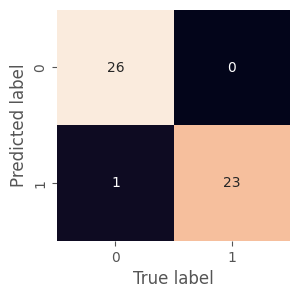

In [16]:
# Import seaborn for improving visualisation of confusion matrix
import seaborn as sns

# Make confusion matrix more visual
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    

    
plot_conf_mat(y_test, y_preds)

In [17]:
# classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.96      0.98        24

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [18]:
# ---------- Plotta olika K värden ----------

# Create a pandas dataframe with the data as the values of the results dictionary,
# the index as the keys of the results dictionary and a single column called accuracy.
# Be sure to save the dataframe to a variable.
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["Accuracy"])

# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar();

NameError: name 'results' is not defined

In [ ]:
# Lets try to predict
test_input = [[25, 32], [24.2, 31.5], [22, 34], [20.5, 34]]  # should be pika(1), pika(1), pika(1), pichu(0) 
four_test_points = pd.DataFrame(test_input, columns=['Width', 'Height'])

y_preds = clf.predict(four_test_points)
y_preds

array([1, 0, 1, 0], dtype=int64)

Accuracy is at 94.0%!
Accuracy is at 96.0%!
Accuracy is at 96.0%!
Accuracy is at 100.0%!
Accuracy is at 96.0%!
Accuracy is at 94.0%!
Accuracy is at 96.0%!
Accuracy is at 98.0%!
Accuracy is at 94.0%!
Accuracy is at 94.0%!
[0.94, 0.96, 0.96, 1.0, 0.96, 0.94, 0.96, 0.98, 0.94, 0.94]


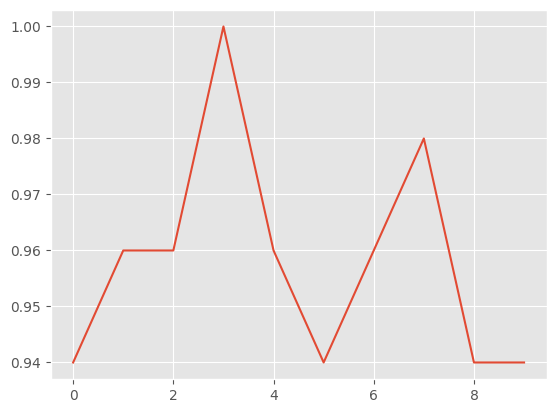

In [27]:
# Loop 10 times - testing
clf = KNeighborsClassifier(n_neighbors=10) # Clf, ( classifier)

results = []
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 50)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    results.append(score)
    print(f"Accuracy is at {score*100}%!")

print(results)
plt.plot(results)
    